<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module08/monte_carlo_simulations.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulations

## Introduction

In this module, we will review the technique Monte Carlo simulation to introduce uncertainty to our models and predictions. In preparation for the live session, please read the following article and the accompanying video about stock market crashes.

https://www.fool.com/investing/stock-market/basics/crashes/

## Concepts

You will find a list of important concepts we will review in the module below.

- Distributions
- Histograms
- Line plots
- Monte Carlo simulations
- Uncertainty

## Interaction

A Monte Carlo simulation is a computational technique that uses random sampling to generate a range of possible outcomes for a given scenario or problem. It uses numerous simulations or trials with varied inputs based on probability distributions. The more simulations that are run, the more accurate the average result becomes, approximating the true value. 

Monte Carlo simulation is a technique useful for evaluating complex systems, allowing for the incorporation and estimation of risk and uncertainty in prediction models. It is used in fields such as finance, engineering, supply chain, and research, among others.

In this interaction, we will run a system dynamics model using Python from this Jupyter Notebook and add a Monte Carlo simulation to the model. 

### Instructions

Simulate and analyze the investment in the following <a href="https://www.investopedia.com/terms/i/indexfund.asp">index funds</a> using the provided code and model. An index fund is a type of investment that replicates the performance of an index. 

<b>Scenario 1 - Investing in an S&P 500 index fund</b>

The S&P 500 is an index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.

The S&P 500 index has an average return of 7.78% with a standard deviation of 19.1% based on its historical performance.   

<b>Scenario 2 - Investing in an S&P TSX Index</b>

S&P TSX is an index that measures the stock performance of about 250 companies listed on the Toronto Stock Exchange, so it represents the Canadian market.

The S&P TSX index has an average return of 6.49% with a standard deviation of 15.42% based on its historical performance.

### Initial Conditions, Assumptions, and Limitations

To simplify the model and the analysis, consider the following initial conditions, assumptions and limitations.

- The term of the investment (time horizon) is 30 years.
- The initial capital is 10,000 CAD.
- The interest is compounded annually.
- The model only permits deposits obtained from the interests earned.
- The model doesn't permit withdrawals from the investment account.
- Assume that both indexes, S&P 500 and S&P TSX, follow a normal distribution.
- Assume that the past performance of the index can be used to predict future performance.

In [ ]:
# Install library to run system dynamics models using Python
!pip install pysd

In [ ]:
# Install additional library to run system dynamics models using Python
!pip install netCDF4

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pysd
import pandas as pd

### Probability Distributions

Probability distribution of the S&P 500 and S&P TSX indexes calculated based on their historical performance.

In [78]:
# Plot a normal distribution with a given mean and standard deviation.
# Parameters:
    # - mu (float): Mean of the normal distribution.
    # - sigma (float): Standard deviation of the normal distribution.
    # - num_points (int): Number of points for plotting.

def plot_normal_distribution(mu=0, sigma=1, num_points=1000):
    
    # Generate x values
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, num_points)
    
    # Generate corresponding y values from the normal distribution PDF
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"µ={mu}, σ={sigma}")
    plt.title("Normal Distribution")
    plt.xlabel("Interest rate")
    plt.ylabel("Probability Density Function (PDF)")
    plt.legend()
    plt.grid(True)
    plt.show()

Normal distribution of the S&P 500 index based on its historical performance.

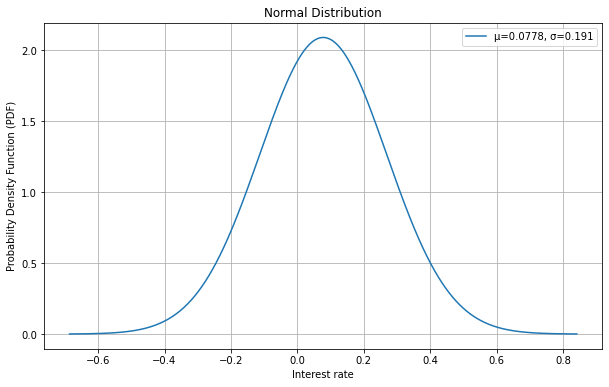

In [76]:
plot_normal_distribution(0.0778, 0.1910)

Normal distribution of the S&P TSX index based on its historical performance.

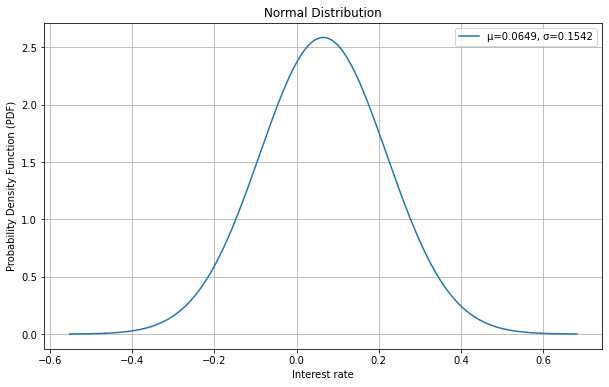

In [77]:
plot_normal_distribution(0.0649, 0.1542)

### Monte Carlo Simulation

Monte Carlo simulation of a one year investment.

In [9]:
def simulate_investment(num_simulations, initial_investment, mean_return, std_dev_return):
    end_values = []

    for _ in range(num_simulations):
        # Randomly sample a rate of return from the normal distribution
        rate_of_return = random.gauss(mean_return, std_dev_return)
        
        # Calculate the end value of the investment using this rate of return
        end_value = initial_investment * (1 + rate_of_return)
        end_values.append(end_value)

    return end_values

In [71]:
"""
Adjust the following values to simulate different index funds.
"""
num_simulations = 1000
initial_investment = 10000
mean_return = 0.0778  # 7.78% mean return of the S&P 500 index
std_dev_return = 0.1910  # 19.1% standard deviation of the S&P 500 index

In [72]:
end_values = simulate_investment(num_simulations, initial_investment, mean_return, std_dev_return)

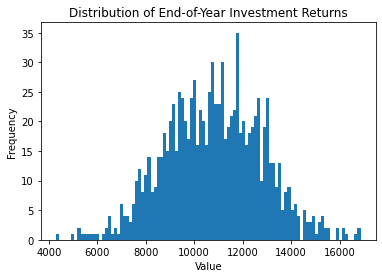

In [73]:
# Plot histogram of results
plt.hist(end_values, bins=100)
plt.title("Distribution of End-of-Year Investment Returns")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### System Dynamics Model

Process to load and run a system dynamics model using Python from a Jupyter Notebook.

In [33]:
# Load a system dynamics model using the library PySD
model = pysd.read_vensim('Module 8 - Investment returns.mdl')

In [34]:
# Runs a system dynamics models and save the resulting data in a variable
simulation_data = model.run(progress=True, return_columns=['Return rate','Returns','Investment'])

Time:  0:00:00 [##########################################################]100%


In [35]:
# Data obtained from running the system dynamics model
simulation_data

,Return rate,Returns,Investment
0,0.07,700.000000,10000.000000
1,0.07,749.000000,10700.000000
2,0.07,801.430000,11449.000000
3,0.07,857.530100,12250.430000
4,0.07,917.557207,13107.960100
5,0.07,981.786211,14025.517307
6,0.07,1050.511246,15007.303518
7,0.07,1124.047034,16057.814765
8,0.07,1202.730326,17181.861798
9,0.07,1286.921449,18384.592124


### System Dynamics and Monte Carlo Simulation

Integration of a systems dynamics model and a Monte Carlo simulation.

In [84]:
def monte_carlo_simulation(num_simulations, initial_investment, mean_return, std_dev_return):
    monte_carlo_results = pd.DataFrame()
    for iteration in range(num_simulations):
        s = np.random.normal(mean_return, std_dev_return, 30)
        return_rate = pd.Series(index=range(30), data=s)

        new_simulation_data = model.run(params={'Return rate': return_rate,'Initial investment': initial_investment}, return_columns=['Return rate','Returns','Investment'])

        temporal_df = pd.DataFrame(new_simulation_data)

        simulation_id = str(iteration + 1).rjust(len(str(num_simulations)), '0')

        temporal_df = temporal_df.rename(columns={"Return rate": "Return rate " + simulation_id, "Returns": "Returns " + simulation_id, "Investment": "Investment " + simulation_id})

        monte_carlo_results = pd.concat([monte_carlo_results, temporal_df], axis=1)
    return (monte_carlo_results)

In [85]:
monte_carlo_results = monte_carlo_simulation(num_simulations, initial_investment, mean_return, std_dev_return)

In [86]:
monte_carlo_results = monte_carlo_results.reindex(sorted(monte_carlo_results.columns), axis=1)

In [87]:
monte_carlo_results

,Investment 0001,Investment 0002,Investment 0003,Investment 0004,Investment 0005,Investment 0006,Investment 0007,Investment 0008,Investment 0009,Investment 0010,...,Returns 0991,Returns 0992,Returns 0993,Returns 0994,Returns 0995,Returns 0996,Returns 0997,Returns 0998,Returns 0999,Returns 1000
0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3282.883503,3157.087039,2176.383039,2408.354543,-1911.851639,547.008051,1026.702377,2906.087110,-1698.320013,258.687638
1,11412.092763,8590.255964,13709.936111,10945.644565,9127.700811,11576.808919,10740.250666,10916.261603,9578.727861,11175.694279,...,3533.951646,753.864225,2147.296707,568.350941,-2001.554455,689.297678,1949.996171,-2024.220606,1331.732298,-4254.851017
2,10853.681050,10713.998900,14924.586096,7352.646909,9861.894532,10301.379848,10058.153099,14644.763726,10392.265505,10359.642346,...,963.114226,-2005.366597,-724.886243,-2318.826035,1210.324091,3790.381418,-4974.053850,1465.614592,-1402.423338,1241.191792
3,11522.541989,10997.326995,17024.970808,6223.363273,11691.156587,6915.074999,12578.040238,12374.372309,9186.619669,12285.597411,...,3350.504176,2053.000805,-1415.535976,1738.272811,1512.045601,-346.151037,723.287765,1361.302490,-3636.401346,-799.877796
4,9764.954794,12058.353592,17064.612891,5343.897026,14115.613711,6881.833108,12785.758066,9655.384703,6478.990261,12105.271818,...,2932.356995,687.965302,1582.200990,1344.232758,2379.405186,-4425.112031,-107.682968,1872.844769,-538.616287,2247.618054
5,13747.152557,11865.116607,16341.851641,6348.888965,14616.010574,7554.545005,12411.317479,12925.585140,7767.543163,9593.745949,...,264.298476,819.804213,5305.274683,1930.443574,1554.411033,-1739.242506,3649.237597,-570.346823,533.222026,1733.103056
6,14368.406852,13930.240482,15939.815190,5602.256235,19536.850611,8824.890112,11648.652891,16666.230806,9280.923252,11638.329658,...,-1465.489865,3979.479259,3332.920901,-4790.017572,3139.009863,2825.576061,4127.877410,3886.087284,2032.808349,1854.002149
7,22133.754525,10197.785301,19872.216186,5812.444587,23982.853746,8235.939192,14573.794096,18025.302348,8518.572459,15555.807305,...,-1499.751530,-5650.781460,-532.607541,-1972.802880,4253.906017,-679.485056,4395.385342,-207.893949,1424.849362,3730.175679
8,19083.130322,10650.845694,19014.443592,6772.328325,18519.062191,10708.455493,17182.400600,14161.673353,9708.534467,11328.189296,...,4137.699795,262.938096,1732.066099,292.879530,7439.479805,1026.361407,5728.163558,5341.881204,2113.221427,-5275.945568
9,23110.881798,9513.786219,23086.883384,7523.153037,26637.802604,13817.599314,16158.383777,14026.133105,13554.845633,11114.773627,...,11556.336901,1095.240885,-1325.843267,568.653267,-2979.985112,741.961112,3094.230260,-4398.506882,-463.082087,-2135.527755


In [88]:
# Exports the data to Excel
monte_carlo_results.to_excel('log.xlsx', index=True, header=True)

## Assignment 

### Conceptual Option

Compare the S&P 500 and S&P TSX index funds using Monte Carlo simulations and determine which one you recommend investing in. Use <a href="https://www.portfoliovisualizer.com/monte-carlo-simulation">this online calculator</a> to estimate the performance of the index funds. 

The configuration of the calculator display below closely replicates the Monte Carlo simulation covered in class. Enter the normal distribution values of the funds in the sections highlighted in red.

<img src="https://drive.google.com/uc?export=view&id=183Cf9TTZzr4q_7YRzVetkfrOkpMQ87zG" />

Note that the calculator website has three tabs with results: <i>Simmulation Summary</i>, <i>Expected Returns</i>, and <i>Histograms</i>. Pay close attention to the <i>Performance Summary</i>, <i>Portfolio Balance</i>, and <i>Portfolio End Balance Histogram</i> results. Submit a 2-3 page Word document with the produced graphs, descriptions, and insights. Reference the consulted sources using the APA format.

### Hands-on Option

Compare the S&P 500 and S&P TSX index funds using Monte Carlo simulations and determine which one you recommend investing in. Use the provided code and model to estimate the performance of two index funds. Analyze the data and create visualizations in Excel to support your recommendation. Submit a 1-2 page Word document with the produced graphs, descriptions, and insights. Reference the consulted sources using the APA format.

## Recommended Videos

- Netflix (2018, June 20). Explained | The Stock Market [Video]. YouTube. https://www.youtube.com/watch?v=ZCFkWDdmXG8